In [105]:

!pip install pillow==10.3.0 --quiet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10'u yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Sınıf isimleri
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("✅ Veri hazır →", x_train.shape, y_train.shape)



✅ Veri hazır → (50000, 32, 32, 3) (50000, 1)


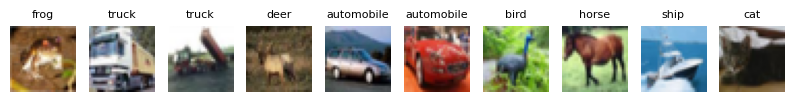

In [107]:

plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]], fontsize=8)
    plt.axis("off")
plt.show()



In [109]:
# Cell 3 ──────────────────────────────────────────────
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



C:\Users\buyuk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:

history = model.fit(
    x_train, y_train,
    epochs=5,                # Burayı 10-20 yaparsan doğruluk artar
    validation_data=(x_test, y_test)
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3825 - loss: 1.7001 - val_accuracy: 0.5881 - val_loss: 1.1727
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6109 - loss: 1.1202 - val_accuracy: 0.6387 - val_loss: 1.0335
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6574 - loss: 0.9774 - val_accuracy: 0.6613 - val_loss: 0.9664
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6977 - loss: 0.8754 - val_accuracy: 0.6675 - val_loss: 0.9693
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7211 - loss: 0.8030 - val_accuracy: 0.6914 - val_loss: 0.8974


In [115]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test doğruluğu: {test_acc:.3f}")

model.save("cifar10_cnn.h5")   # İstediğin isimle kaydedebilirsin
print("✅ Model kaydedildi: cifar10_cnn.h5")



✅ Test doğruluğu: 0.691
✅ Model kaydedildi: cifar10_cnn.h5


In [119]:
gr.close_all()    # varsa açık arayüzleri kapat


Closing server running on port: 7866
Closing server running on port: 7867
Closing server running on port: 7861
Closing server running on port: 7868
Closing server running on port: 7864
Closing server running on port: 7860
Closing server running on port: 7862
Closing server running on port: 7863
Closing server running on port: 7865


In [121]:

import gradio as gr
from PIL import Image
import traceback

# (Model zaten bellekteyse aşağıdaki satıra gerek yok.
#  Notebook'u yeniden başlatırsan .h5 dosyasından yükleyebilirsin.)
# model = tf.keras.models.load_model("cifar10_cnn.h5")

def predict(img: Image.Image):
    try:
        img = img.convert("RGB")           # Renk uzayını düzelt
        img = img.resize((32, 32))         # CIFAR boyutu
        arr = np.array(img).astype("float32") / 255.0
        arr = np.expand_dims(arr, 0)       # (1,32,32,3)

        probs = model.predict(arr, verbose=0)[0]
        top3 = {class_names[i]: float(probs[i]) for i in np.argsort(probs)[::-1][:3]}
        return top3

    except Exception as e:
        traceback.print_exc()
        return {"Hata": 1.0}

gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil", image_mode="RGB", label="JPG/PNG görsel yükleyin"),
    outputs=gr.Label(num_top_classes=3),
    title="CIFAR-10 Görsel Sınıflandırıcı",
    description="Uçak, kedi, köpek, gemi vb. 10 sınıftan tahmin yapar"
).launch(share=False, inbrowser=True)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
import numpy as np
import matplotlib.pyplot as plt


In [127]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[y_train.flatten() == 0]  # class 0: airplane
x_test = x_test[y_test.flatten() == 0]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Train:", x_train.shape, "Test:", x_test.shape)


Train: (5000, 32, 32, 3) Test: (1000, 32, 32, 3)


In [135]:
def downscale(images, scale=2):
    return tf.image.resize(images, (16,16), method='area')   # 16×16 LR

# 16×16 → 32×32 bicubic up-sample
def upscale_bicubic(images):
    return tf.image.resize(images, (32,32), method='bicubic')

x_train_lr_small = downscale(x_train)
x_test_lr_small  = downscale(x_test)

x_train_lr = upscale_bicubic(x_train_lr_small)   # (32,32,3)
x_test_lr  = upscale_bicubic(x_test_lr_small)


In [137]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(64, (9,9), activation='relu', padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(3,  (5,5), activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='mse')


In [139]:
history = model.fit(
    x_train_lr,          # bulanık 32×32
    x_train,             # keskin 32×32 hedef
    epochs=10,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0349 - val_loss: 0.0075
Epoch 2/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0069 - val_loss: 0.0050
Epoch 3/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 4/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 5/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 6/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 7/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 8/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 9/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0029 - val_loss: 0.0025


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


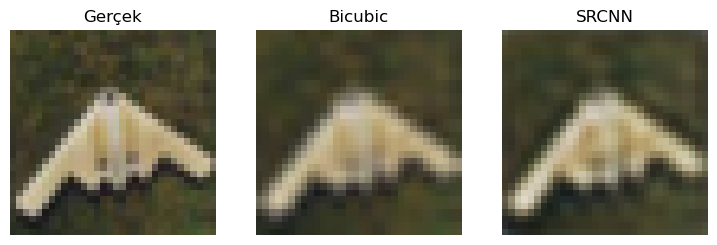

In [141]:
idx = 5
lr  = x_test_lr[idx:idx+1]
sr  = model.predict(lr)

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(x_test[idx]);           plt.title("Gerçek");   plt.axis('off')
plt.subplot(1,3,2); plt.imshow(lr[0]);                 plt.title("Bicubic");  plt.axis('off')
plt.subplot(1,3,3); plt.imshow(sr[0]);                 plt.title("SRCNN");    plt.axis('off')
plt.show()


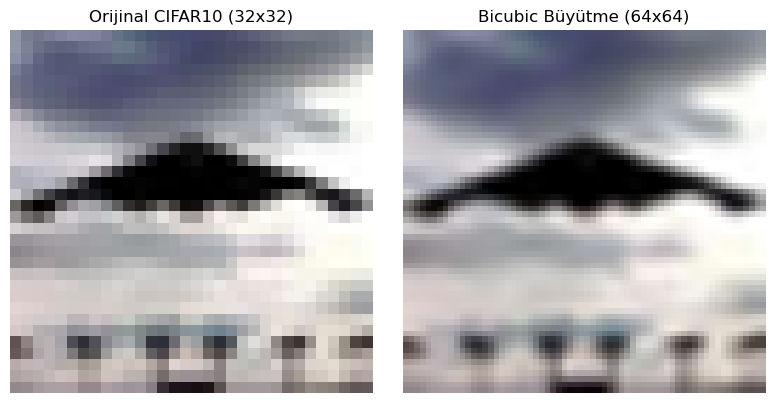

In [143]:
import matplotlib.pyplot as plt
from tensorflow.image import resize

idx = 10  # herhangi bir uçak örneği
original = x_test[idx]
bicubic_2x = resize(original[np.newaxis, ...], (64,64), method='bicubic')[0]

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(original)
plt.title("Orijinal CIFAR10 (32x32)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(bicubic_2x.numpy())
plt.title("Bicubic Büyütme (64x64)")
plt.axis("off")

plt.tight_layout()
plt.show()
